# 签到

题目给了一个gif文件。一眼盯帧可以发现，部分帧上会有一些类似二维码的黑色区域：

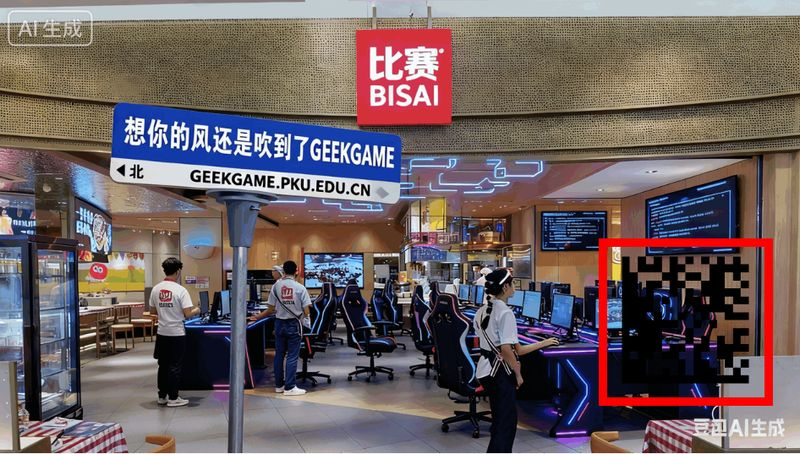

自己装过机的小伙伴们应该认出来了。这是Data Matrix，一种比QR信息密度更高的二维码格式。Intel和AMD的CPU都用它在CPU上刻印序列号：

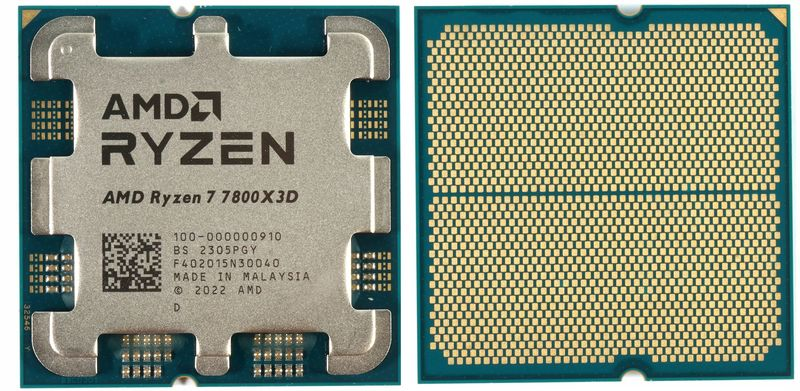

有点尴尬的是，部分帧上的二维码和背景糊成一块了，直接扫大概率扫不出来；不过仔细看可以发现Data Matrix和背景颜色还是有区别的。以下我们请出Gemini指导，把GIF的每一帧和第一帧做差并保存到图片：

In [ ]:
from PIL import Image, ImageChops
import os

def calculate_gif_frame_diffs(gif_path="tutorial-signin.gif", output_dir="output_diffs"):
    """
    提取 GIF 的每一帧，计算其与第一帧的差，并保存为图片。

    :param gif_path: 输入的 GIF 文件路径。
    :param output_dir: 输出差异图片的目录。
    """
    # 检查 GIF 文件是否存在
    if not os.path.exists(gif_path):
        print(f"错误：文件 '{gif_path}' 不存在。")
        return

    # 创建输出目录（如果不存在）
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"创建目录：'{output_dir}'")

    try:
        # 打开 GIF 图片
        with Image.open(gif_path) as im:
            # 提取第一帧作为基准
            im.seek(0)
            first_frame = im.convert("RGB")
            
            # 保存第一帧本身作为参考
            first_frame_output_path = os.path.join(output_dir, "frame_000_first.png")
            first_frame.save(first_frame_output_path)
            print(f"已保存第一帧到 '{first_frame_output_path}'")

            # 遍历 GIF 的所有帧
            for i in range(1, im.n_frames):
                im.seek(i)
                current_frame = im.convert("RGB")

                # 计算当前帧与第一帧的差异
                # ImageChops.difference 会返回一个新图像，其中每个像素都是两个输入图像对应像素的绝对差
                diff_image = ImageChops.difference(first_frame, current_frame)
                # 我们希望把diff image 0-1化
                diff_image = diff_image.point(lambda x: 255 if x > 0 else 0)

                # 为了让差异更明显，可以增强对比度或检查是否有差异
                # bbox() 会返回一个包含非零区域的边界框，如果图像是纯黑的（无差异），则返回 None
                if diff_image.getbbox():
                    # 构造输出文件名
                    output_path = os.path.join(output_dir, f"diff_with_first_frame_{i:03d}.png")
                    
                    # 保存差异图片
                    diff_image.save(output_path)
                    print(f"帧 {i} 与第一帧存在差异，已保存到 '{output_path}'")
                else:
                    print(f"帧 {i} 与第一帧没有差异。")

        print("\n处理完成！")

    except FileNotFoundError:
        print(f"错误：无法找到文件 '{gif_path}'")
    except Exception as e:
        print(f"处理过程中发生错误: {e}")

if __name__ == "__main__":
    calculate_gif_frame_diffs()

已保存第一帧到 'output_diffs\frame_000_first.png'
帧 1 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_001.png'
帧 2 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_002.png'
帧 3 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_003.png'
帧 4 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_004.png'
帧 5 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_005.png'
帧 6 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_006.png'
帧 7 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_007.png'
帧 8 与第一帧存在差异，已保存到 'output_diffs\diff_with_first_frame_008.png'

处理完成！


输出的图片长这样：

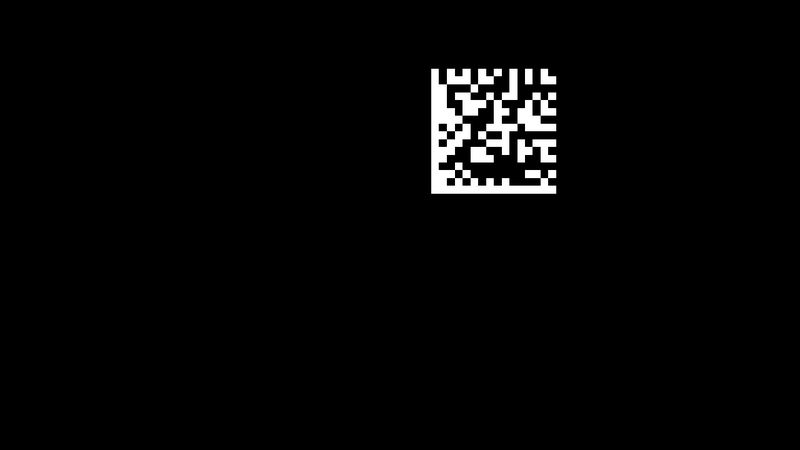

Data Matrix可以使用极为先进的[Scandit](https://websdk.demos.scandit.com/)进行扫描。比较尴尬的是Scandit不支持扫描文件，所以还得从手机复制一下，然后我们就可以从每一帧中得出Flag碎片。